**Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df['Gender'])

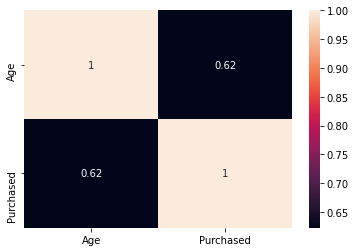

In [ ]:
import seaborn as sns
sns.heatmap(df[['Age','Purchased']].corr(),annot=True)

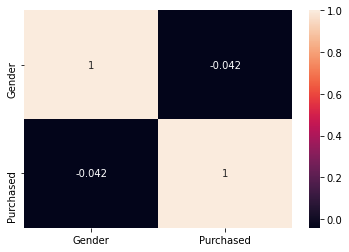

In [ ]:
import seaborn as sns
sns.heatmap(df[['Gender','Purchased']].corr(),annot=True)

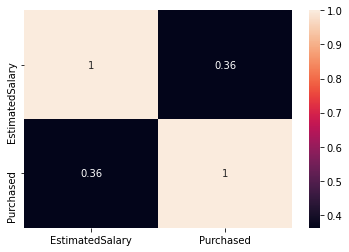

In [ ]:
import seaborn as sns
sns.heatmap(df[['EstimatedSalary','Purchased']].corr(),annot=True)

In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred))

[[65  3]
 [ 8 24]]


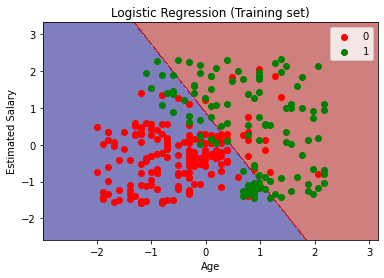

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Z = lr.predict(np.array([X1.ravel(),X2.ravel()]).T)
plt.contourf(X1,X2,Z.reshape(X1.shape),cmap = 'seismic',alpha=0.5)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red','green'][i], label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

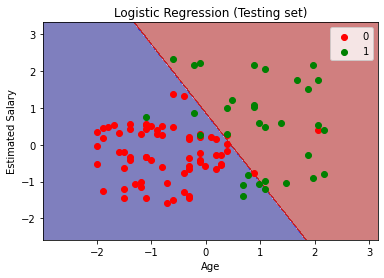

In [ ]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
plt.contourf(X1,X2,lr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5, cmap = 'seismic')
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set == j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**K neighbors classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
ypred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,y_test))

[[64  3]
 [ 4 29]]


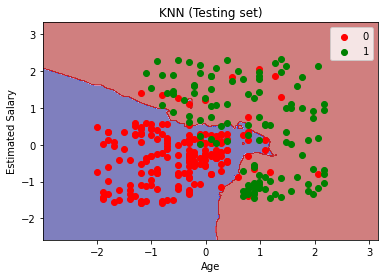

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_train, y_train
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('KNN (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

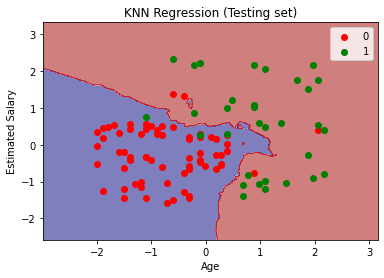

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_test, y_test
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('KNN Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Support vector classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ypred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,y_test))

[[66  8]
 [ 2 24]]


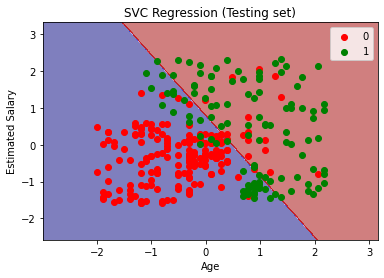

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_train, y_train
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('SVC Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

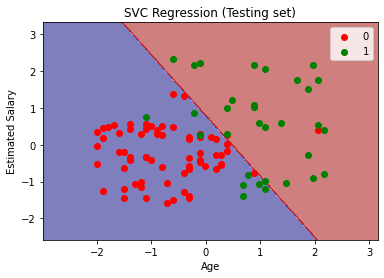

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_test, y_test
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('SVC Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Kernel SVC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ypred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,y_test))

[[64  3]
 [ 4 29]]


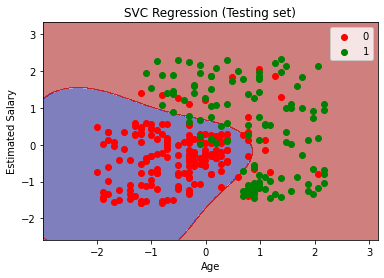

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_train, y_train
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('SVC Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

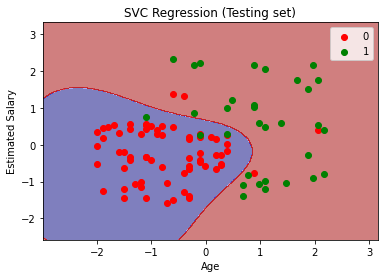

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_test, y_test
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('SVC Regression (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Gaussian NB**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
ypred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,y_test))

[[65  7]
 [ 3 25]]


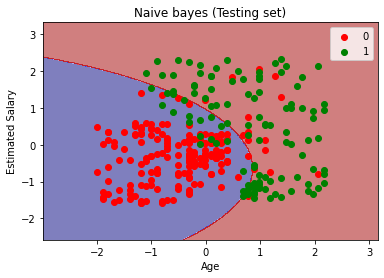

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_train, y_train
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('Naive bayes (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

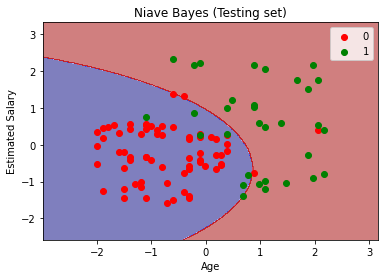

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_test, y_test
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('Niave Bayes (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Decision tree classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
ypred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,y_test))

[[62  3]
 [ 6 29]]


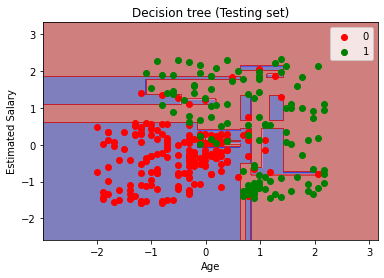

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_train, y_train
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('Decision tree (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

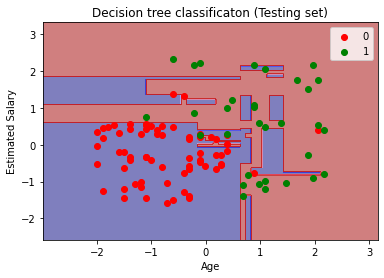

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_test, y_test
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('Decision tree classificaton (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Random Forest Classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth = 3)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
ypred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ypred,y_test))

[[64  2]
 [ 4 30]]


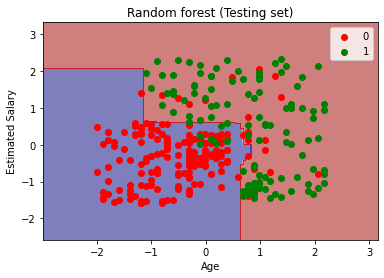

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_train, y_train
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('Random forest (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

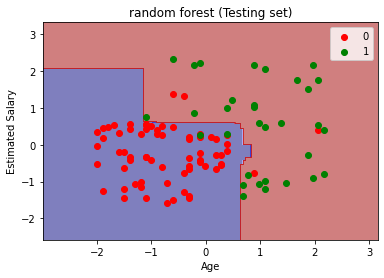

In [ ]:
from matplotlib.colors import ListedColormap
xset, yset = X_test, y_test
X1, X2 = np.meshgrid(np.arange(xset[:,0].min()-1,xset[:,0].max()+1,0.01),np.arange(xset[:,1].min()-1,xset[:,1].max()+1,0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),cmap = 'seismic', alpha = 0.5)
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate([0,1]):
  plt.scatter(xset[yset==j,0],xset[yset==j,1],color = ListedColormap(('red','green'))(i),label=j)
plt.title('random forest (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()